### k-means with sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

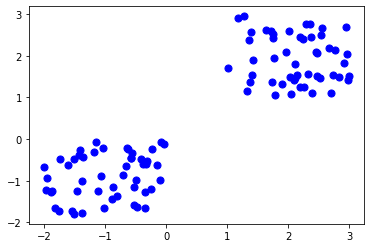

In [3]:
X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [4]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

In [5]:
Kmean.cluster_centers_

array([[ 2.12774016,  1.9226315 ],
       [-0.96222955, -0.88319138]])

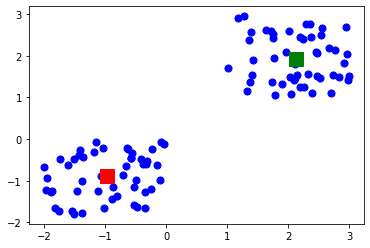

In [6]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(2.12774016, 1.9226315, s=200, c='g', marker='s')
plt.scatter(-0.96222955, -0.88319138, s=200, c='r', marker='s')
plt.show()

In [7]:
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
sample_test = np.array([-3.0,-3.0])
second_test = sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([1])